# 2장. Supervised Learning

앞에서 살펴보았듯이 지도학습 머신 러닝은 가장 널리 쓰이는 성공적인 타입의 머신 러닝이다. 이번 장에서 우리는 지도학습(supervised learning)에 대해 좀 더 깊이 다루고, 몇 가지 유명한 알고리즘들에 대해 살펴볼 것이다. 우리는 이미 1장에서 붓꽃의 물리적인 측정치를 이용하여 그 종을 분류하는 지도학습 머신 러닝 애플리케이션을 경험했다.

지도학습은 주어진 입력 데이터로부터 사전에 정해진 어떤 특정한 결과를 예측하길 원하고, 입력/출력 데이터 쌍을 가지고 있을 때 사용된다는 것을 기억할 것이다. 우리는 트레이닝셋으로 불리는 입력/출력 데이터로부터 머신 러닝 모델을 만들었다. 우리의 목적은 이전에 보지 못한 새로운 데이터에 대해서 정확한 예측값을 도출하는 것이다.

## 분류 분석과 회귀 분석

지도학습 머신 러닝에서 주로 사용되는 두 가지 타입은 분류분석(Classification)과 회귀분석(Regression)이다.

분류분석의 목적는 클래스 레이블을 예측하는 것이다. 클래스 레이블은 도출되기를 원하는 결과를 사전에 정의해 놓은 목록이다. 1장에서 우리는 선택가능한 세 가지 종 중의 하나로 붓꽃의 종을 분류했다. 분류분석은 종종 이진 분류분석(binary classification)과 다중클래스 분류분석(multiclass classification)으로 나뉜다. 이진 분류는 단 두 개의 클래스 중 하나로 구분하는 특수한 경우이며, 다중클래스 분류의 클래스는 두 개 이상이다. 이진 분류분석은 단순히 질문에 “예/아니오”로 답하는 것이라 생각하면 된다. 이메일이 스팸인지 아닌지 분류하는 것을 그 예로 들 수 있다. 반면에, 붓꽃의 종을 분류하는 예는 다중클래스 분류분석이라고 할 수 있다. 다른 예로는 특정 웹사이트에 사용된 언어를 분류하는 작업을 들 수 있다. 선택 가능한 대상 언어들은 물론 미리 정의되어 있을 것이다.

회귀분석의 목적은 연속된 숫자, 또는 수학용어로 실수값을 예측하는 것이다. 어떤 사람의 교육 수준, 나이, 주거지에 따라 그의 연수입을 예측하는 것은 회귀분석의 한 예이다. 예측된 값은 주어진 범위내의 어떠한 값이라도 될 수 있다. 회귀분석의 또 다른 예로는 옥수수 농장의 지난해 생산량, 날씨, 일꾼의 수를 근거로 올해의 생산량을 예측하는 것이다. 생산량은 임의의 어떤 수라도 될 수 있다.

회귀분석과 분류분석을 구별하는 가장 쉬운 방법은 결과값에 연속성이 있는지 없는지를 보는 것이다. 만약 도출 가능한 여러 결과값들 사이에 연속성이 있으면 회귀분석 문제라고 할 수 있다. 어떤 사람의 연수입 금액에는 확실한 연속성이 있다. 그의 1년 수입이 40,000 달러이든, 40,001 달러이든 실제적인 차이는 미미하다. 즉 40,000 달러로 예측이 나와야하는 알고리즘에서 결과가 39,999 또는 40,001 어느 쪽으로 나와도 큰 문제가 되지는 않는다.

하지만, 웹사이트에 사용된 언어를 판별하는 문제에 있어서는(이것은 분류분석 문제이다) 매우 다르다. 한 웹사이트는 A 또는 B 언어로 되어 있다. 두 언어 사이에는 연속성이라는 개념이 있을 수 없다. 이를테면 프랑스어와 영어 사이에 해당하는 언어란 존재하지 않는다.

## Generalization, Overfitting, and Underfitting

지도학습에서 우리는 트레이닝 데이터를 기반으로 모델을 만들고, 그 다음에 우리가 사용한 트레이닝셋과 동일한 특성을 가진 새로운 데이터에 대한 예측을 한다. 만약 그 모델이 새로운 데이터에 대해 정확한 예측을 할 수 있다면, 우리는 트레이닝셋으로부터 테스트셋으로 일반화(generalize)가 가능하다고 말할 수 있다. 우리가 원하는 것은 가능한 한 정확하게 일반화된 모델을 만들어 내는 것이다.

일반적으로 우리는 트레이닝 데이터에 맞추는 방식으로 모델을 만든다. 만약 트레이닝셋과 테스트셋이 서로 공통적인 요인을 충분히 가지고 있다면 모델의 테스트셋에 대한 예측이 정확할 것이라고 기대할 수 있다. 하지만, 그렇지 못한 경우가 종종 있다.

자세한 설명을 위해 만든 예제를 살펴보자. 신참 데이터 사이언티스트가 이전에 보트를 구매한 고객과 그렇지 않은 고객에 대한 데이터를 바탕으로 어느 고객이 보트를 구매할지 예측하려고 한다. 실제 구매가 이루어질 가능성이 높은 사람들에게 프로모션 이메일을 보내야 하지만, 전혀 관심이 없는 사람들에게 까지 보내서 귀찮게 하면 안 된다.

아래의 고객 테이블을 보자.

![Alt 테이블2-1](Images/Table_2_1.png)

잠시 데이터를 살펴본 신참 데이터 사이언티스트는 다음과 같은 규칙을 생각해냈다: "45세 이상, 자녀 3명 미만이며 이혼하지 않은 상태인 고객은 보트를 구매하고 싶어한다." 이 규칙이 얼마나 정확한지 질문을 한다면 이 데이터 사이언티스트는 "100% 정확합니다"라 대답할 것이다. 사실, 테이블에 나타난 데이터를 보면 이 규칙은 정확하다. 데이터상 같은 나이가 두번 나타나는 경우는 없기 때문에 나이가 66, 52, 53, 58세인 고객들은 보트를 구매하길 원할 것이고 나머지는 아니라고 말할 수 있다.

이 데이터셋을 바탕으로 그 외에도 많은 규칙들을 만들어낼 수 있지만, 이 데이터셋에 대해서 예측을 수행하는 것이 목표가 아님을 기억해야 한다. 이 고객들에 대한 답을 우리는 이미 알고 있기 때문이다. 우리가 원하는 것은 신규 고객들에게 보트 구매 의사가 있는지 알아내는 것이다. 우리에게 필요한 것은 새로운 고객들에 대해 잘 동작하는 규칙을 찾는 것이기 때문에, 트레이닝셋에 대해 100%의 정확성을 갖는 모델은 전혀 도움이 되지 않는다. 그 데이터 사이언티스트의 규칙이 새로운 고객에게도 잘 동작하리라고 기대하긴 어려울 것이다.

알고리즘이 새로운 데이터에 대해서도 잘 동작하는지 아닌지 측정하는 유일한 방법은 테스트셋으로 검증하는 것이다. 하지만 우리는 직감적으로 단순한 모델일수록 새 데이터에 대해 좀 더 일반화가 잘 된다는 것을 알 수 있다. “50세 이상인 사람은 보트를 사고 싶어한다”는 규칙은 여기에 자녀 수와 결혼 상태를 추가한 규칙보다 다른 고객들에 대해 더 잘 설명할 것이다. 그렇기 때문에 우리는 항상 가장 단순한 모델을 찾길 원한다. 그래서 “가지고 있는 정보의 양에 비해 모델이 너무 복잡한” 경우 과적합(과대적합, overfitting) 되었다고 말한다.

모델이 트레이닝셋의 특성에 너무 최적화되어 새로운 데이터에 대해서 일반화를 잘 하지 못할 때 overfitting이 발생한다. 그와 반대로, 만약 당신의 모델이 너무나 단순하다면 (예를 들어 “집을 소유한 모든 사람은 보트 구매를 원한다”) 그 모델은 데이터의 다양한 측면을 제대로 잡아내지 못한 것이며, 트레이닝셋에 대해서도 제대로 동작하지 못할 것이다. 너무 단순한 모델을 선택하는 것을 과소적합(underfitting)이라고 한다.

우리의 모델을 조금 더 복잡하게 만들면 트레이닝 데이터에 대한 예측력은 좋아질 것이다. 하지만 이 모델이 지나치게 복잡해진다면 트레이닝셋의 각 개별 데이터 포인트에 너무 집중하게 되어서 새로운 데이터에 대해서는 일반화가 전혀 되지 않을 것이다.

여기서 최상의 일반화 성능(generalization performance)을 내는 sweet spot이 있음을 알 수 있다. 이 지점이 우리가 찾는 모델이다. 그림 2-1은 overfitting과 underfitting 사이의 상호 모순적 관계를 나타낸 것이다.

![Alt 표2-1](Images/Figure_2_1.png)

<그림2-1. 모델 복잡도와 트레이닝셋/테스트셋 예측 정확도 간의 관계>

### 데이터셋의 크기와 모델 복잡도의 관계

모델의 복잡도는 트레이닝 데이터셋에 포함된 입력값의 분포와 매우 밀접한 관계를 가지고 있다. 매우 다양한 데이터 포인트들을 가지고 있다면 과적합을 피하면서 좀더 복잡한 모델을 사용할 수 있다. 일반적으로 데이터의 양이 늘어날수록 데이터의 다양성도 커지기 때문에 대용량의 데이터셋이 좀더 정교한 모델을 만들기에 좋다. 하지만 동일한 데이터 포인트의 중복이 많거나 서로 매우 비슷한 데이터가 많은 것은 도움이 되지 않는다.

앞의 예제로 돌아가서, 만약 우리가 10,000개 이상의 고객 데이터를 가지고 있다면 “45세 이상이고, 자녀가 3명 이하, 이혼하지 않은 상태의 고객이라면 보트 구매에 관심을 가지고 있다.”라는 규칙은 12개 데이터를 사용했을 때보다 훨씬 더 신뢰성이 가질 것이다.

이 책에서 우리는 고정된 크기의 데이터셋을 사용할 것이다. 하지만 실제 업무에서는 얼마나 많은 데이터를 수집해야 하는지 결정하는 능력이 당신의 모델을 개선하는데 많은 도움이 될 것이다. 대량의 데이터가 주는 이점을 절대 과소평가하지 말라.

## 지도학습 머신 러닝 알고리즘

우리는 이제 가장 많이 알려진 머신 러닝 알고리즘을 살펴보고, 데이터로부터 학습하는 방법과 예측을 수행하는 방법에 대해 설명할 것이다. 또한 모델의 복잡도에 따라 모델이 어떻게 달라지는지 논의하고, 각 알고리즘이 모델 생성 원리에 대해 간략하게 살펴볼 것이다. 각 알고리즘의 장점과 단점, 그리고 어떤 형태의 데이터를 적용하는 것이 좋을지도 알아볼 것이다. 그리고 알고리즘에서 중요한 파라미터들과 옵션들에 대해서도 설명할 것이다.

각 알고리즘에 대한 설명을 너무 상세하게 읽을 필요는 없지만, 그 모델들을 이해하는 것은 머신 러닝 알고리즘들이 서로 다른 방식으로 동작함을 알게 해줄 것이다.

### 샘플 데이터셋

우리는 알고리즘들을 설명하기 위해 몇가지 데이터셋을 사용할 것이다. 어떤 데이터셋은 알고리즘의 특정한 측면을 강조하기 위해 임의적으로 만든 것이며, 또 다른 것들은 사이즈가 큰 실무용 데이터이다.

이진 분류를 설명하기 위해 만든 forge 데이터셋은 2개의 피쳐를 가지고 있다. 다음의 코드는 이 데이터셋의 모든 데이터 포인트를 보여주는 산점도(그림2-2)를 그리는 것이다. 산점도의 x축은 첫번째 피쳐이고, y축은 두번째 피쳐이다. 산점도에서는 항상 하나의 데이터 포인트는 하나의 점으로 표현된다. 점의 색깔과 모양은 해당 데이터의 클래스를 가리킨다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn
%matplotlib inline

In [2]:
# 데이터셋을 만든다

In [3]:
X, y = mglearn.datasets.make_forge()

In [4]:
# 데이터셋으로 산점도를 그린다

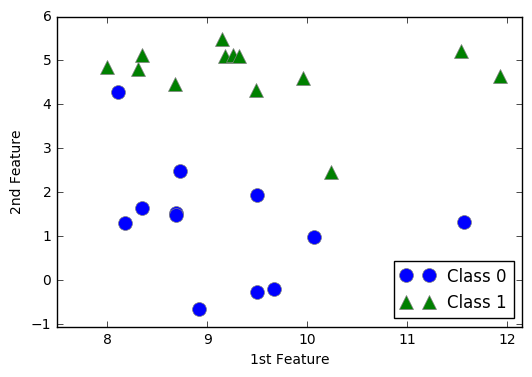

In [5]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)  # 데이터의 첫번째, 두번째 피쳐
plt.legend(["Class 0", "Class 1"], loc=4)    # 범례. loc : 범례의 위치 지정.
plt.xlabel("1st Feature")
plt.ylabel("2nd Feature")

<그림2-2. forge 데이터셋의 산점도>

X.shape 로 볼 수 있듯이 이 데이터셋은 26개의 데이터 포인트를 가지고 있다.

In [6]:
X.shape

(26, 2)

회귀분석 알고리즘을 설명하기 위해서는 wave 데이터셋을 사용할 것이다. wave 데이터셋은 1개의 입력 변수(피쳐)와 1개의 연속형 목표 변수를 가지고 있다. (그림2-3)

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)

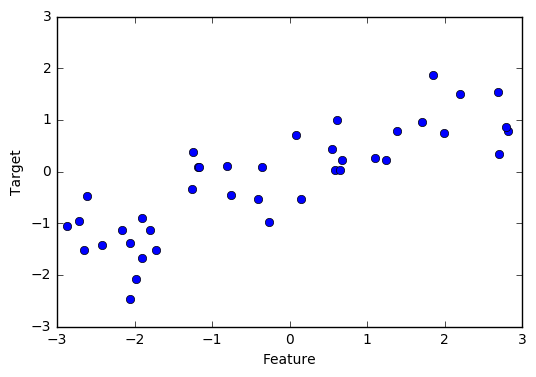

In [8]:
plt.plot(X, y, 'o')   # 'o' : 점 모양 지정
plt.ylim(-3, 3)       # y축의 범위 지정
plt.xlabel("Feature")
plt.ylabel("Target")

<그림2-3. wave 데이터셋의 플롯. x축은 피쳐를, y축은 회귀분석의 목표 변수를 보여주고 있다.>

이렇게 단순하고 저차원의 데이터셋을 사용하는 이유는 그것을 2차원 공간에 시각화하기가 좋기 때문이다. 2개 이상의 피쳐를 가진 데이터는 모든 특성을 다 보여주기 쉽지 않다.

우리는 또한 scikit-learn에 포함되어 있는 실무적인 데이터셋도 함께 사용한다. 그 중 하나는 위스콘신 유방암 데이터셋(앞으로 cancer로 지칭)으로 유방암과 관련된 종양의 의학적인 측정치들이 포함되어 있다. 각 종양은 “benign”(양성의, 무해한 종양) 또는 “malignant”(악성의, 암이 되는 종양)으로 레이블되어 있다.

In [9]:
# cancer 데이터를 가져온다.

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'DESCR'])

이 데이터셋은 569개의 데이터 포인트와 30개의 피쳐를 가지고 있다.

In [11]:
cancer.data.shape

(569, 30)

그 중에 212 개의 데이터 포인트는 "악성"(malignant)으로, 나머지 357 개는 "양성"(benign)으로 레이블 되어 있다.

In [12]:
print("{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

{'benign': 357, 'malignant': 212}


In [13]:
# 데이터셋의 피쳐 목록
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


이 데이터에 대해 관심이 있다면 cancer.DESCR에 자세한 정보가 있다. [역자주 : print(cancer.DESCR) 하면 된다.]

실제 회귀분석용 데이터인 보스턴 주택가격 데이터셋도 사용할 것이다. 이 데이터셋은 1970년대에 보스턴 여러 지역의 주택가격 중앙값(median)을 예측하기 위한 자료로, 범죄율, 찰스 강과의 거리, 고속도로 접근성 등등의 정보를 포함하고 있다. 이 데이터셋은 13 개의 피쳐에 의해 설명되고 있는 506 개의 데이터 포인트를 가지고 있다.

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

여기서 우리의 한 가지 목적은 이 데이터셋의 입력값이 되는 13개 피쳐들 사이의 결합을 통해 생성 가능한 모든 상호작용을 만들어내어 데이터셋을 확장시키는 것이다. 즉, 현재 가지고 있는 범죄율과 고속도로 접근성 피쳐를 결합하여 새로운 피쳐를 만드는 것이다. 이처럼 새로운 파생 컬럼을 만드는 것은 피쳐 엔지니어링(feature engineering)이라고 부르며, 나중에 제4장에서 자세히 논의할 것이다. 파생변수들이 추가된 데이터셋은 load_extended_boston 함수로 불러올 수 있다.

In [15]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

기존의 13 개 피쳐에, 이것들을 결합하여 새로 만든 피쳐 91개를 더해 전체 104 개의 피쳐를 가지고 있다.

이제 다양한 머신 러닝 알고리즘들의 특성들을 살펴보자. 가장 먼저 1장에서 본 k-최근접 이웃(k-NN, k-Nearest Neighbors) 알고리즘을 다시 만나 보자.

## k-최근접 이웃

k-NN 알고리즘은 거의 틀림없이 가장 단순한 머신 러닝 알고리즘이다. 새로운 데이터 포인트에 대해 예측을 할 때, 트레이닝 데이터 내에서 가장 가까운 데이터 포인트(즉, 최근접 이웃)를 찾는 알고리즘이다.

### k-최근접 이웃 분류분석

k-NN 알고리즘의 가장 단순한 버전은 최근접 이웃을 단 한 개만 고려하는 것이다. 그림2-4는 forge 데이터셋에 이 케이스(최근접 이웃 1개)를 적용한 분류분석을 나타낸 것이다.

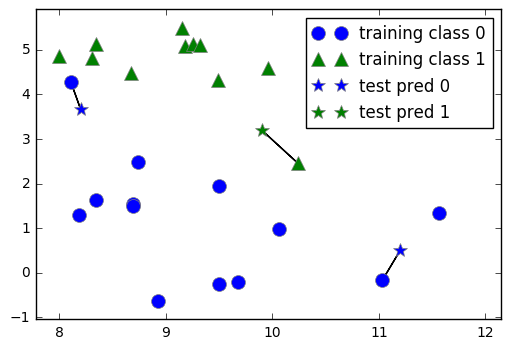

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

<그림2-4. forge 데이터셋에 1-NN 모델을 적용한 예측>

세 개의 새로운 데이터 포인트는 별모양의 점으로 표시되어 있다. 각각에 대해 가장 가까운 트레이닝 데이터가 무엇인지 표시했다. 바로 그 지점의 데이터 포인트가 가진 레이블(색상으로 구분된 클래스)이 1-NN 알고리즘이 내리는 예측 결과이다.

최근접 이웃의 수로 1만이 아닌 임의의 숫자 k개를 적용하는 것도 고려해 볼 수 있다. 여기서 k-최근접 이웃 알고리즘의 이름이 유래했다. 이웃의 수를 1개 이상 사용할 경우에는 표결(voting)을 통해 레이블을 할당한다. 각 테스트 데이터 포인트의 최근접 이웃들을 클래스 0에 속한 갯수와 클래스 1에 속한 갯수를 계산한 후 더 많은 쪽의 클래스로 정하는 것이다. 다음의 예는 최근접 이웃을 3개 사용한 경우이다.

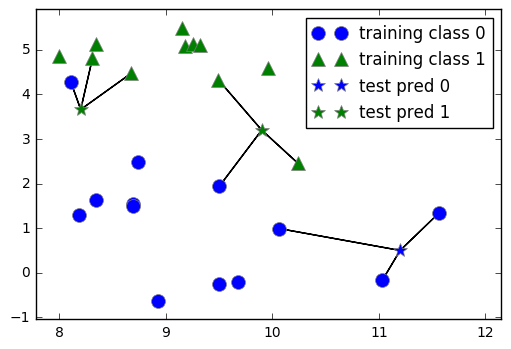

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

<그림2-5. forge 데이터셋에 3-NN 모델을 적용한 예측>

왼쪽 위에 있는 신규 데이터 포인트에 대한 예측이 1개의 이웃만 사용한 예측 결과와 달라진 것을 볼 수 있다.

k-NN 알고리즘은 이처럼 이진 분류 문제뿐만 아니라 클래스의 갯수가 여러 개인 데이터셋에도 적용할 수 있다. 클래스가 여러 개인 경우의 예측에도 이웃들이 속한 클래스 중에서 그 수가 가장 많은 클래스를 레이블로 결정한다.

이제 scikit-learn에서 k-NN 알고리즘을 어떻게 사용하는지 알아보자. 우선 1장에서 배운 것처럼 데이터를 트레이닝 데이터와 테스트 데이터로 분리한다.

In [18]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

그 다음, k-NN 분류기 클래스를 임포트하고 인스턴스화 시킨다. 이 때 이웃의 숫자 등과 같은 파라미터를 설정할 수 있다. 여기서는 3으로 설정하자.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

트레이닝셋을 사용하여 분류기의 fit 메소드를 호출해 모델을 생성한다.

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

predict 메소드를 호출하여 테스트 데이터로 예측을 수행한다. 테스트셋의 각 데이터 포인트는 트레이닝셋에서 해당 갯수의 최근접 이웃을 계산하고 그 중 가장 빈도가 많은 클래스를 찾는다.

In [22]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


이 모델이 얼마나 일반화가 잘 되었는지 평가하기 위해 테스트 데이터 및 테스트 레이블과 함께 score 메소드를 호출한다.

In [23]:
print("Test Accuracy : {:.2f}".format(clf.score(X_test, y_test)))

Test Accuracy : 0.86


이 모델의 정확도가 86%임을 알 수 있다. 이것은 테스트 데이터의 샘플 중 86%의 클래스를 정확히 예측했음을 말해준다.

### KNeighborsClassifier 분석

2차원 데이터셋에 대한 가능한 예측을 xy 평면에 표현할 수 있다. 그러면 할당되는 클래스에 따라 색깔로 표시된 영역이 나타난다. 이것은 알고리즘이 어느 선에서 클래스 0과 클래스 1을 나누는지 알 수 있는 의사결정 경계선(decision boundary)을 보기 위한 것이다. 다음 코드는 최근접 이웃을 1, 3, 9개로 설정했을 때 나오는 decision boundary를 시각화한 것이다.

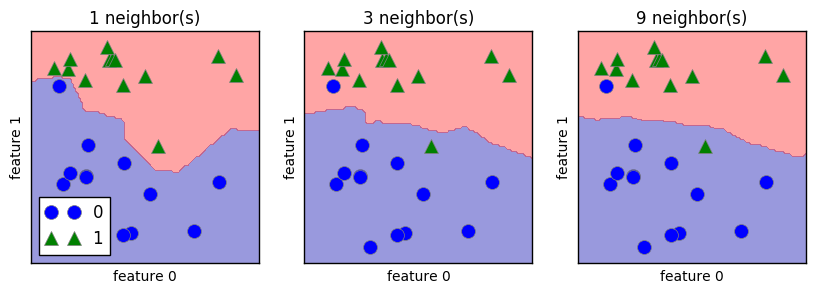

In [24]:
# 한 화면에 plot 3개를 동시에 그리도록 영역을 분할
fig, axes = plt.subplots(1, 3, figsize=(10,3))

# 최근접 이웃 갯수를 각각 1,3,9개로 설정하여 분류분석 수행
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

# 왼쪽 아래에 범례 추가
axes[0].legend(loc=3)

<그림2-6. 최근접 이웃 갯수에 따른 decision boundary의 변화>

1개의 이웃을 사용한 왼쪽 그림에서 decision boundary가 트레이닝 데이터와 가깝게 진행되고 있는 것을 볼 수 있다. 그리고 이웃의 갯수가 늘어날수록 decision boundary는 점점 매끄러워지고 있다. 매끄러운 경계선은 단순한 모델에 해당한다. 다시 말해서, 작은 이웃 갯수는 모델의 높은 복잡도를 나타내며(그림2-1의 오른쪽), 많은 이웃은 낮은 모델 복잡도를 표현한다(그림2-1의 왼쪽).

모델 복잡도와 일반화 성능 사이에서 어떻게 결정을 내려야 하는지 알아보자. 여기서는 유방암 데이터셋을 사용한다. 데이터를 먼저 트레이닝 데이터와 테스트 데이터로 나눈다. 그리고 나서 이웃 갯수가 달라짐에 따라 트레이닝셋과 테스트셋의 성능을 평가한다. 그림2-7이 그 결과를 보여주고 있다.

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)

In [27]:
# 최근접 이웃의 갯수를 1부터 10까지 설정
neighbors_settings = range(1,11)

# 최근접 이웃의 갯수가 바뀔 때마다 각 예측의 정확도를 저장할 빈 객체
training_accuracy = []   # 트레이닝셋 정확도 저장
test_accuracy = []       # 테스트셋 정확도 저장

In [28]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)     # 클래스 인스턴스화
    clf.fit(X_train, y_train)                               # 모델 생성
    training_accuracy.append(clf.score(X_train, y_train))   # 트레이닝셋에 대한 정확도
    test_accuracy.append(clf.score(X_test, y_test))         # 테스트셋에 대한 정확도

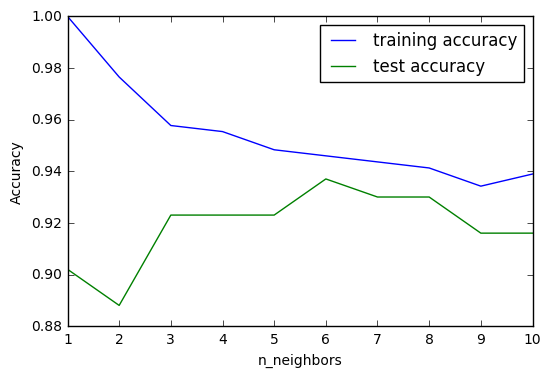

In [29]:
# 1부터 10까지 이웃 수 변화에 따른 모델의 정확도 추이
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

<그림2-7. 이웃 갯수 변화에 따른 트레이닝셋과 테스트셋의 정확도 비교>

### k-최근접 이웃 회귀분석

k-최근접 이웃 알고리즘을 이용해 회귀분석을 할 수도 있다. 이번에는 wave 데이터셋을 사용해서 1개의 이웃으로 시작해보자. x축에 초록색 별로 표시된 것처럼 3개의 테스트 데이터 포인트를 추가했다. 1개의 이웃을 사용한 경우 예측값은 가장 가까운 이웃의 목표변수 값(target value)이다. 이것은 그림2-8에 파란색 별로 표시되어 있다.

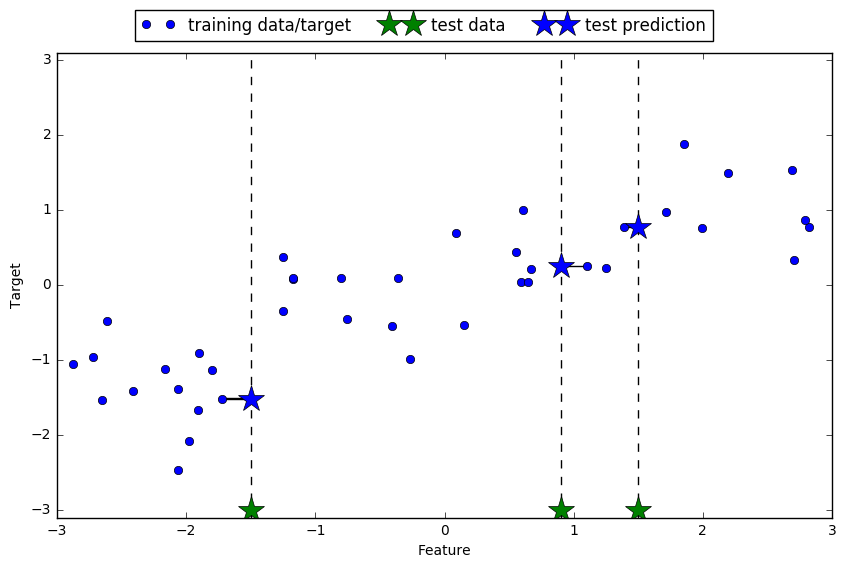

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

<그림2-8. wave 데이터셋에 대한 1-NN 회귀분석으로 예측 수행>

회귀분석도 1개보다 많은 최근접 이웃을 사용할 수 있다. 여러 개의 이웃을 사용할 때 예측값은 해당 이웃들의 평균이다.(그림2-9)

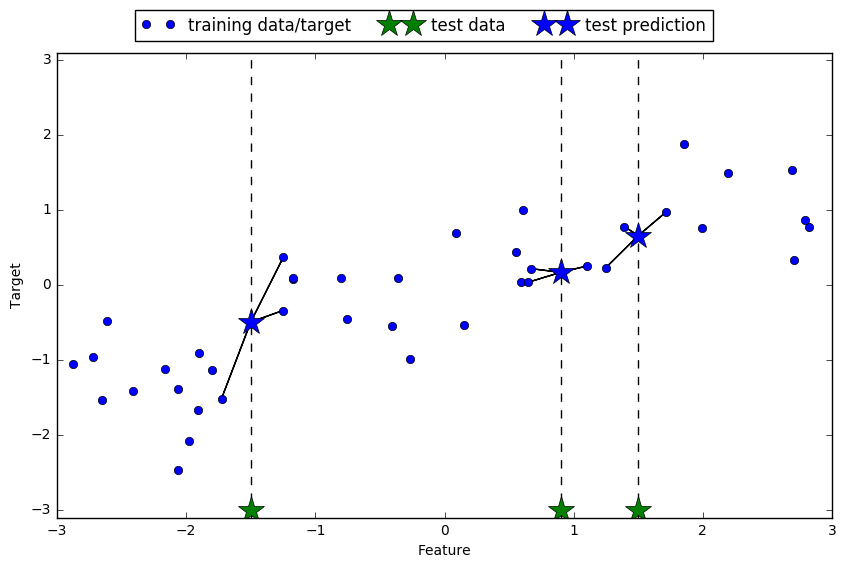

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

<그림2-9. wave 데이터셋에 대한 3-NN 회귀분석으로 예측 수행>

회귀분석을 위한 k-NN 알고리즘은 scikit-learn의 KNeighborsRegressor 클래스에서 구현된다. 사용방법은 KNeighborsClassifier와 비슷하다.

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [33]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [34]:
# wave 데이터셋을 트레이닝셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
# 클래스를 인스턴스화 하면서 최근접 이웃 갯수를 3으로 설정
reg = KNeighborsRegressor(n_neighbors=3)

# 트레이닝 데이터를 이용해 모델에 fitting
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [36]:
# 테스트셋에 대한 예측 수행
print(reg.predict(X_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


이 모델도 역시 score 메소드를 통해 평가를 할 수 있는데, 회귀분석의 경우에는 R2 (R square) 값을 리턴한다. R square는 0에서 1사이의 값으로 회귀 모델의 예측력(또는 설명력)을 말해준다. 1은 완벽한 예측력을 나타낸다. 이 모델에서는 0.83이 나왔는데, 상대적으로 모델의 예측력이 좋음을 가리킨다.

In [37]:
print("Test R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test R^2: 0.83


### KNeighborsRegressor 분석

1차원 데이터셋일 경우에 모든 가능한 피쳐값에 대해서 예측값이 어떻게 나오는지 살펴보자.

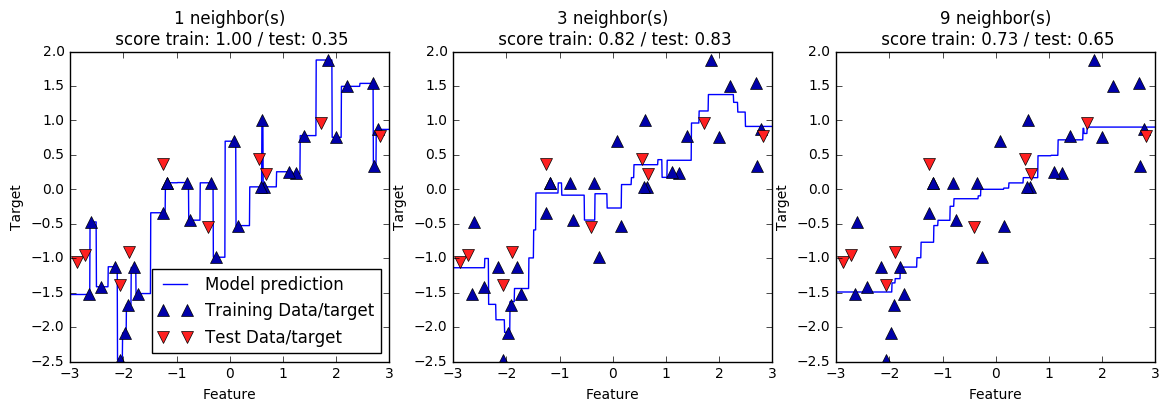

In [38]:
# 한 화면에 plot 3개를 동시에 그리도록 영역을 분할
fig, axes = plt.subplots(1, 3, figsize=(14,4))

# -3에서 3 사이의 숫자로 1000개의 데이터 포인트 생성
line = np.linspace(-3,3,1000).reshape(-1,1)

# 최근접 이웃 갯수를 각각 1,3,9개로 설정하여 분류분석 수행
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    # 위에서 사용한 트레이닝 데이터를 그대로 사용하여 모델링
    reg.fit(X_train, y_train)
    # 1000개의 데이터 포인트에 대해 예측 수행 후 나온 결과값으로 plot에 라인 그리기 
    ax.plot(line, reg.predict(line))
    # 트레이닝 데이터를 plot에 삼각형으로 표시
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    # 테스트 데이터를 plot에 역삼각형으로 표시
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n score train: {:.2f} / test: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

# 범례
axes[0].legend(["Model prediction", "Training Data/target", "Test Data/target"], loc="best")

<그림2-10. 이웃 갯수 변화에 따른 k-NN 회귀분석의 예측력 비교>

1개의 이웃만 사용한 경우에 트레이닝셋의 각 포인트가 예측값에 명확하게 영향을 주고 있음을 볼 수 있다. 즉, 예측된 값들(라인)이 모든 데이터 포인트 위를 지나가고 있다. 이런 특징은 매우 불안정한 예측을 유도할 수 있다. 예측에 사용하는 이웃 수가 많아지자 예측 결과가 매끈해졌지만, 이것은 오히려 트레이닝 데이터에 제대로 fitting이 안된 것일 수도 있다.

### 장점, 단점, 그리고 파라미터들

원칙적으로 KNeighborsClassifier에는 2개의 주요 파라미터가 있다. 최근접 이웃 갯수와 데이터 포인트 간의 거리를 측정하는 방법이다. 실무적으로 3 ~ 5개의 작은 수로 이웃 갯수를 설정하면 대부분 잘 동작하지만, 어떤 경우에는 이 파라미터를 조절해 줄 필요가 있다. 거리 측정의 방법을 선택하는 것은 이 책의 범위를 어느정도 벗어나는 것이다. 기본 설정값인 유클리드 거리(Euclidean distance)를 사용하면 일반적인 경우 잘 동작한다.

k-NN 알고리즘의 장점 중 하나는 매우 이해하기 쉽다는 것이며, 많은 조정이 필요없이도 괜찮은 성과를 낸다는 것이다. 이 알고리즘은 다른 고급 기법들을 시도해 보기 전에 기본적으로 사용하는 것이 좋다. 이 모델은 처리 속도가 매우 빠르지만, 트레이닝 데이터가 매우 큰 경우 (피쳐의 갯수 또는 샘플의 갯수 모두) 예측 수행 속도가 느릴 수도 있다. k-NN 알고리즘을 사용할 때, 데이터 전처리(제3장)는 매우 중요하다. 데이터셋의 피쳐가 매우 많은 경우 (100개 이상) 종종 제대로 동작하지 않을 수도 있으며, 대부분의 피쳐에 0 값이 아주 많이 들어가 있는 경우(이를 sparse dataset이라 부른다) 특히 좋지 않다.